## Heart-Disease Prediction

In this machine learning project, I use machine learning algorithms to make predictions on whether a person is suffering from heart disease or not

In [50]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

#### Loading dataset

Here, we load the Heart-disease taken from kaggle competition dataset to our work environment

In [3]:
df=pd.read_csv("Heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Checking the dtypes of the data columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Hence, from the above result we can say that all the data is in numerical formate

In [6]:
# Checking for missing/Nan values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the above observation,we don't find any missing/Nan values in the datset

In [7]:
# Mathematical understanging of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Understanding the data distribution

Now, we can use visualizations to better understand our data and then look at any processings we might want to do.

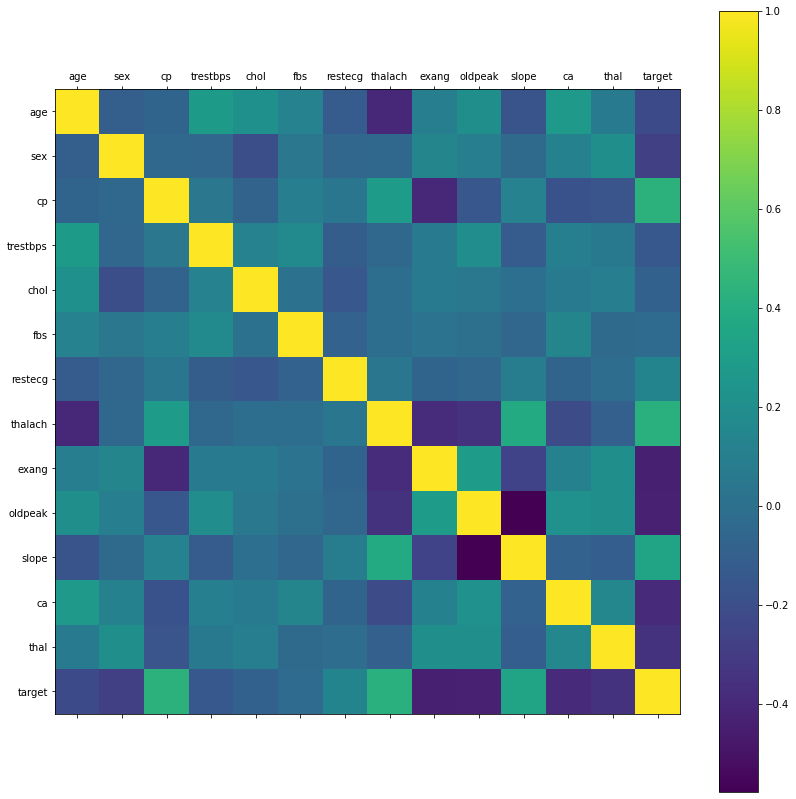

In [14]:
rcParams['figure.figsize'] = 25, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

If we observe the above correlation matrix, we came to know thaat some of the features have negative correlation with the target variable, some features exhibits positive correlation.
Let us plot an histogram to all the features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D89BA10AF0>,
      dtype=object)

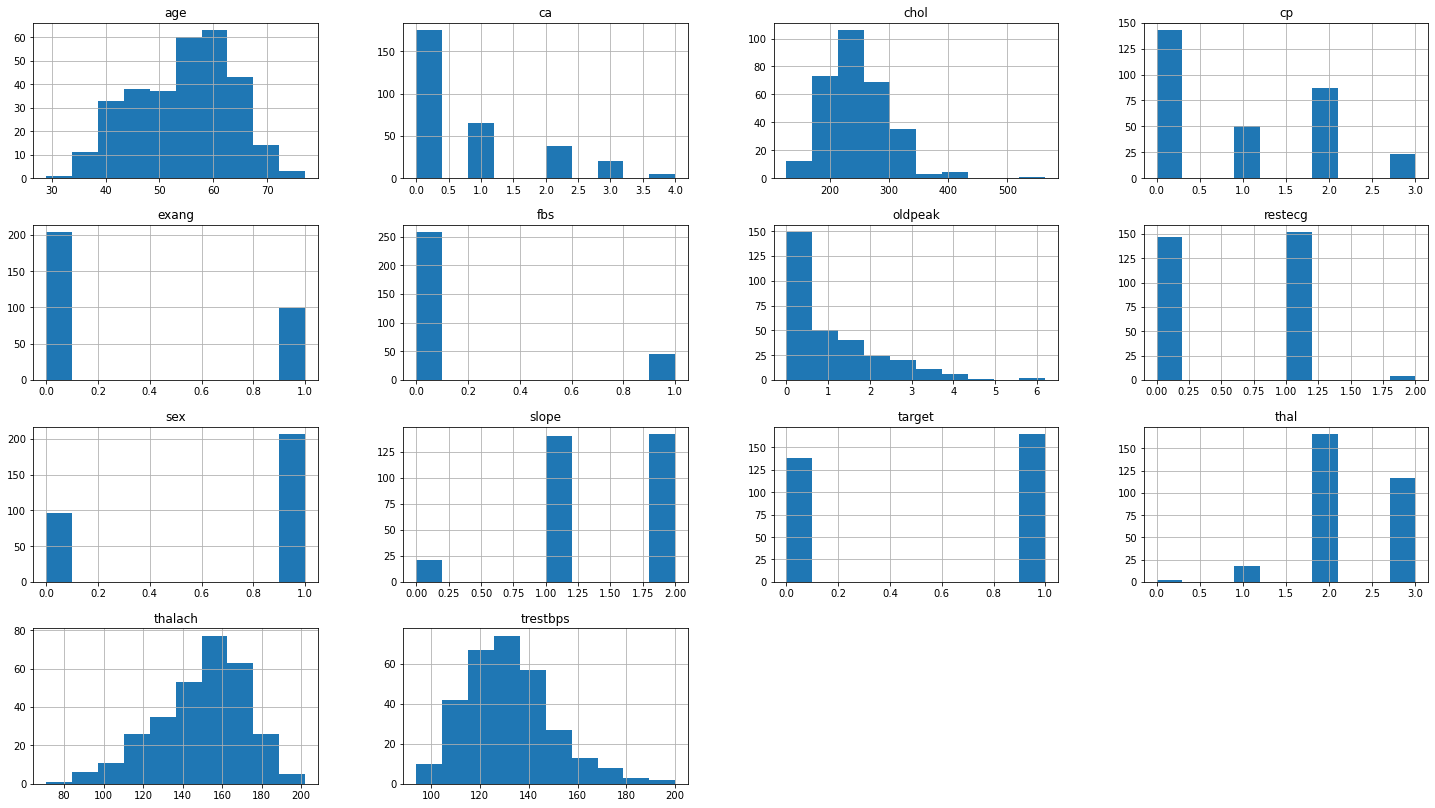

In [15]:
df.hist()

Having a look at the histograms above, I can see that each feature has a different range of distribution.so, using scaling before our predictions should be of good use. Also, the categorical features do stand out.

As we see the above target feature's histogram, the data is distributed similarly. Now I will the check only the target feature's data distribution

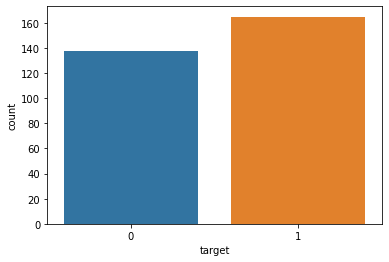

In [19]:
sns.countplot(df['target'])

## Data preprocessing 
Converting categorical Variables into dummie variables and performing scaling before trainig the machine learning model.

In [20]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, I should scale all the values to apply MachineLear ing algorithm

For, scaling the data we should import StandardScaler module from sklearn.preprocessing package

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scale = StandardScaler()
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[features_to_scale] = scale.fit_transform(df[features_to_scale])

Now, I have done scaling to my data values. so before applying Machine learning algorithm we should split the data into train and test data

For spliting data into train and test we should import train_test_split function from sklearn.model_selection module

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(['target'], axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=0)

## Machine Learning

## K Neighbors Classifier :

The classification score varies based on different values of neighbors that we choose. ploting a score graph for different values of K (neighbors) we will able to find the best k value,when we the best score.

To apply K Neighbors Classifier i need to import KNeighborsClassifier from sklearn.neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)   
    knn_classifier.fit(x_train,y_train)
    knn_scores.append(knn_classifier.score(x_test,y_test))
    

    

I have scores of different neighbors(k) values in the list knn_scores. Now I will plot those scores to find which value of k i get the best score

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

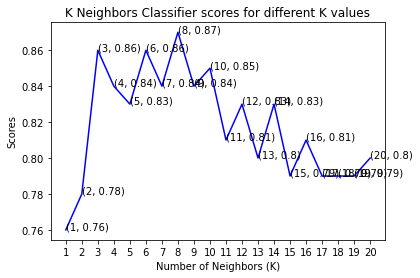

In [40]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the above obtained graph it is cleared that maximum score was achieved is 0.87 by 8 neighbors 

In [44]:
print("The score for K NearesrNeighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Nearest Neighbors Classifier is 87.0% with 8 nieghbors.


## Support vector classifier :
There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

For applying Support vector Classifier we need to import SVC from sklearn.svm

In [45]:
from sklearn.svm import SVC

In [47]:
svc_scores=[]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

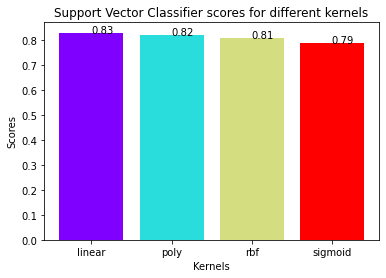

In [51]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The linear kernal performed the best from all other kernels(poly, rbf, sigmoid)

In [54]:
print("The score of support vector classifier is {}% on {} kernel.".format(svc_scores[0]*100,kernels[0]))

The score of support vector classifier is 83.0% on linear kernel.


## Decision Tree Classifier :

For applying decision tree Classifier algorithm i should import sklearn.tree import DecisionTreeClassifier.

I will use the decision tree classifier to model the problem. I will vary between a set of max_features and see which returns the best accuracy.

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
decisiontree_scores=[]
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    decisiontree_scores.append(dt_classifier.score(x_test, y_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

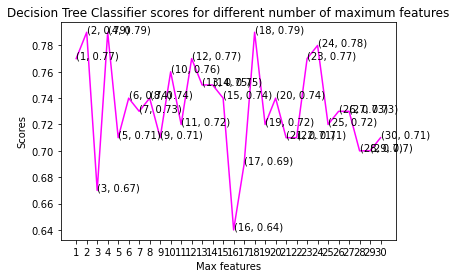

In [70]:
plt.plot([i for i in range(1, len(x.columns) + 1)], decisiontree_scores, color = 'magenta')
for i in range(1, len(x.columns) + 1):
    plt.text(i, decisiontree_scores[i-1], (i, decisiontree_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [72]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(decisiontree_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


## Random Forest Classifier:


To apply Random forest classifier i should import RandomForestClassifier from sklearn.ensemble module
Here I will use Random Forest Classifier to create a model for the problem. I will vary the number of estimators to see their effect.

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
randomforest_scores=[]
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    randomforest_scores.append(rf_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

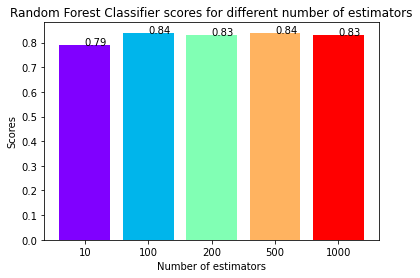

In [81]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], randomforest_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, randomforest_scores[i], randomforest_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximun score is acheived when the estimators are 100 or 500 .

## Conclusions:

- In this project, I used machine learning algorithms to predict whether the person is suffering from heart disease.
- After loading the dataset, I analyzed the distribution of data using graphs. Then I created dummies for categorical features and done scaling for remaining all the features.
- Then I splited the data into train and test data to apply Machine learning algorithms.
- I applied Machine learning algorithms like K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier for the trained data.
- I varied parameters across each model to improve their scores. At the end K Neighbors Classifier achieved the highest score of 87% with 8 nearest neighbors

## References :

1. https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
3. https://pandas.pydata.org/pandas-docs/stable/visualization.html
4. https://www.kaggle.com/ronitf/heart-disease-uci (Dataset taken from kaggle compitetion)